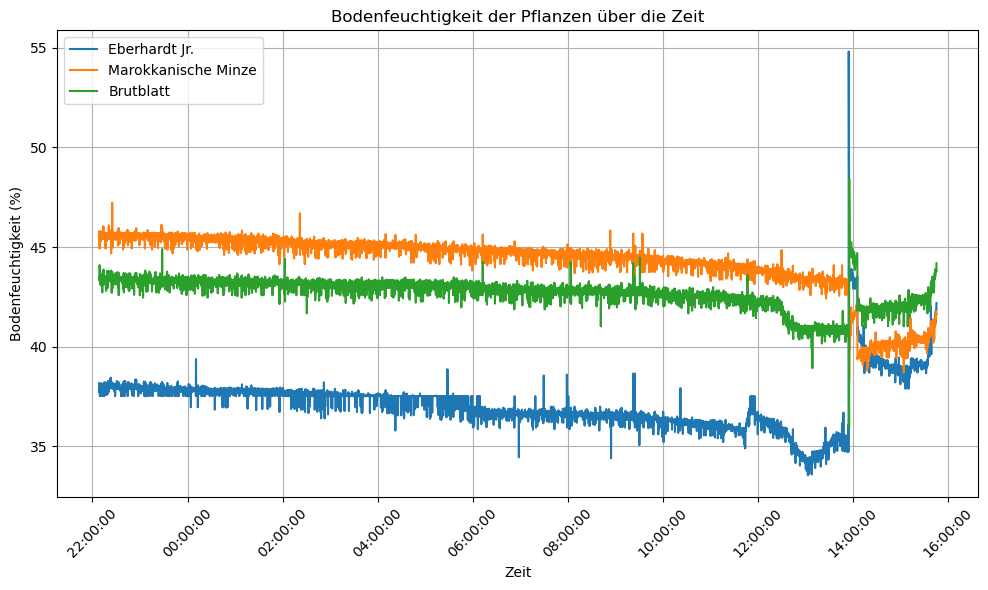

In [39]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import requests
import json
import numpy as np
import time

# Simulierte Anfrage - in deinem Fall durch echte Anfrage ersetzen
r = requests.get('http://192.168.2.41:8080/data')
response = json.loads(r.text)

timestamps = []
eberhardt = []
marokkanische_minze = []
brutblatt = []

for read in response["sensorReads"]:
    timestamps.append(read["timestamp"])
    eberhardt.append(read["plants"][0]["humidity"])
    marokkanische_minze.append(read["plants"][1]["humidity"])
    brutblatt.append(read["plants"][2]["humidity"])

# Zeitstempel in datetime umwandeln
timestamps = [datetime.fromisoformat(ts[:-15]) for ts in timestamps]

# Gleitender Durchschnitt für Glättung
def moving_average(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Daten glätten
#eberhardt_smoothed = moving_average(eberhardt_humidity)
#minze_smoothed = moving_average(marokkanische_minze_humidity)
#brutblatt_smoothed = moving_average(brutblatt_humidity)

# Zeitstempel anpassen, damit sie zur geglätteten Datenlänge passen
#timestamps_smoothed = timestamps[:len(eberhardt_smoothed)]

# Plot erstellen
plt.figure(figsize=(10, 6))

# Daten plotten
plt.plot(timestamps, eberhardt, label="Eberhardt Jr.")
plt.plot(timestamps, marokkanische_minze, label="Marokkanische Minze")
plt.plot(timestamps, brutblatt, label="Brutblatt")

# Formatierung der x-Achse für Zeitstempel
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Labels und Titel
plt.xlabel("Zeit")
plt.ylabel("Bodenfeuchtigkeit (%)")
plt.title("Bodenfeuchtigkeit der Pflanzen über die Zeit")
plt.legend()

# Plot anzeigen
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
